# ExoplanetDetect
This notebook employs data science techniques and machine learning models to predict potential exoplanets in star systems using light intensity curves data derived from observations made by the NASA Kepler space telescope.

## 1. Initializating Project Setup

In [4]:
!pip install --upgrade scikit-learn imbalanced-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/1c/49/30ffcac5af06d08dfdd27da322ce31a373b733711bb272941877c1e4794a/scikit_learn-1.3.2-cp39-cp39-win_amd64.whl.metadata
  Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.2-cp39-cp39-win_amd64.whl (9.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [32]:
!pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/bc/43/242432efc3f60052a4a534dc4926b21e236ab4ec8d4920c593da3f65c65d/xgboost-2.0.2-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 660.6 kB/s eta 0:02:31
   ---------------------------------------- 0.3/99.8 MB 3.4 MB/s eta 0:00:30
   ---------------------------------------- 0.5/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.8/99.8 MB 4.5 MB/s eta 0:00:23
   ---------------------------------------- 1.0/99.8 MB 4.7 MB/s eta 0:00:21
    --------------------------------------- 1.4/99.8 MB 5.2 MB/s eta 0:00:20
    --------------------------------------- 1.6/99.8 MB 5.2 MB/s eta 0:00:19
    --------------------------------------- 1.8/99.8 MB 5.1 MB/s eta 0:00:20
    --------------------------------------- 2.2/99.8 MB 5.3 MB/s eta 0:00:19
    --------------------------

### 1.1 Importing Libraries

In [1]:
# Importing Libraries
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import ndimage
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import recall_score, precision_score, classification_report,accuracy_score,confusion_matrix, roc_curve, auc

In [2]:
# Configurations
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

### 1.2 Loading Dataset into Pandas DataFrame

In [3]:
exoplanet_data = pd.read_csv(r"C:\Users\Ayesha\Downloads\EXODETECT-CLASSICAL MODELS\nasa exoplanet data.csv").fillna(0)
exoplanet_data

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


## 2. Exploratory Data Analysis

### 2.1 Initial Data Analysis and Feature Engineering

In [4]:
exoplanet_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [5]:
# Label Encoding of Target Feature
categ = {2: 1, 1: 0}
exoplanet_data.LABEL = [categ[item] for item in exoplanet_data.LABEL]

In [6]:
print("Dataset Shape: ", exoplanet_data.shape)
print("Dataset Description: ")
exoplanet_data.describe()

Dataset Shape:  (5087, 3198)
Dataset Description: 


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,0.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,0.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,0.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,0.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,0.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,1.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [7]:
exoplanet_data.isnull().sum()

LABEL        0
FLUX.1       0
FLUX.2       0
FLUX.3       0
FLUX.4       0
            ..
FLUX.3193    0
FLUX.3194    0
FLUX.3195    0
FLUX.3196    0
FLUX.3197    0
Length: 3198, dtype: int64

<div class="alert alert-block alert-info">Initial Reading Analysis: Upon initial examination, the dataset seems well-organized. The labels are clearly defined as 0 and 1, and there are no instances of missing values. </div>

### 2.2 Exploring the Distribution of Classes

LABEL
0    5050
1      37
Name: count, dtype: int64


Text(0.5, 0.98, '0: Not Exoplanet; 1: Exoplanet\n')

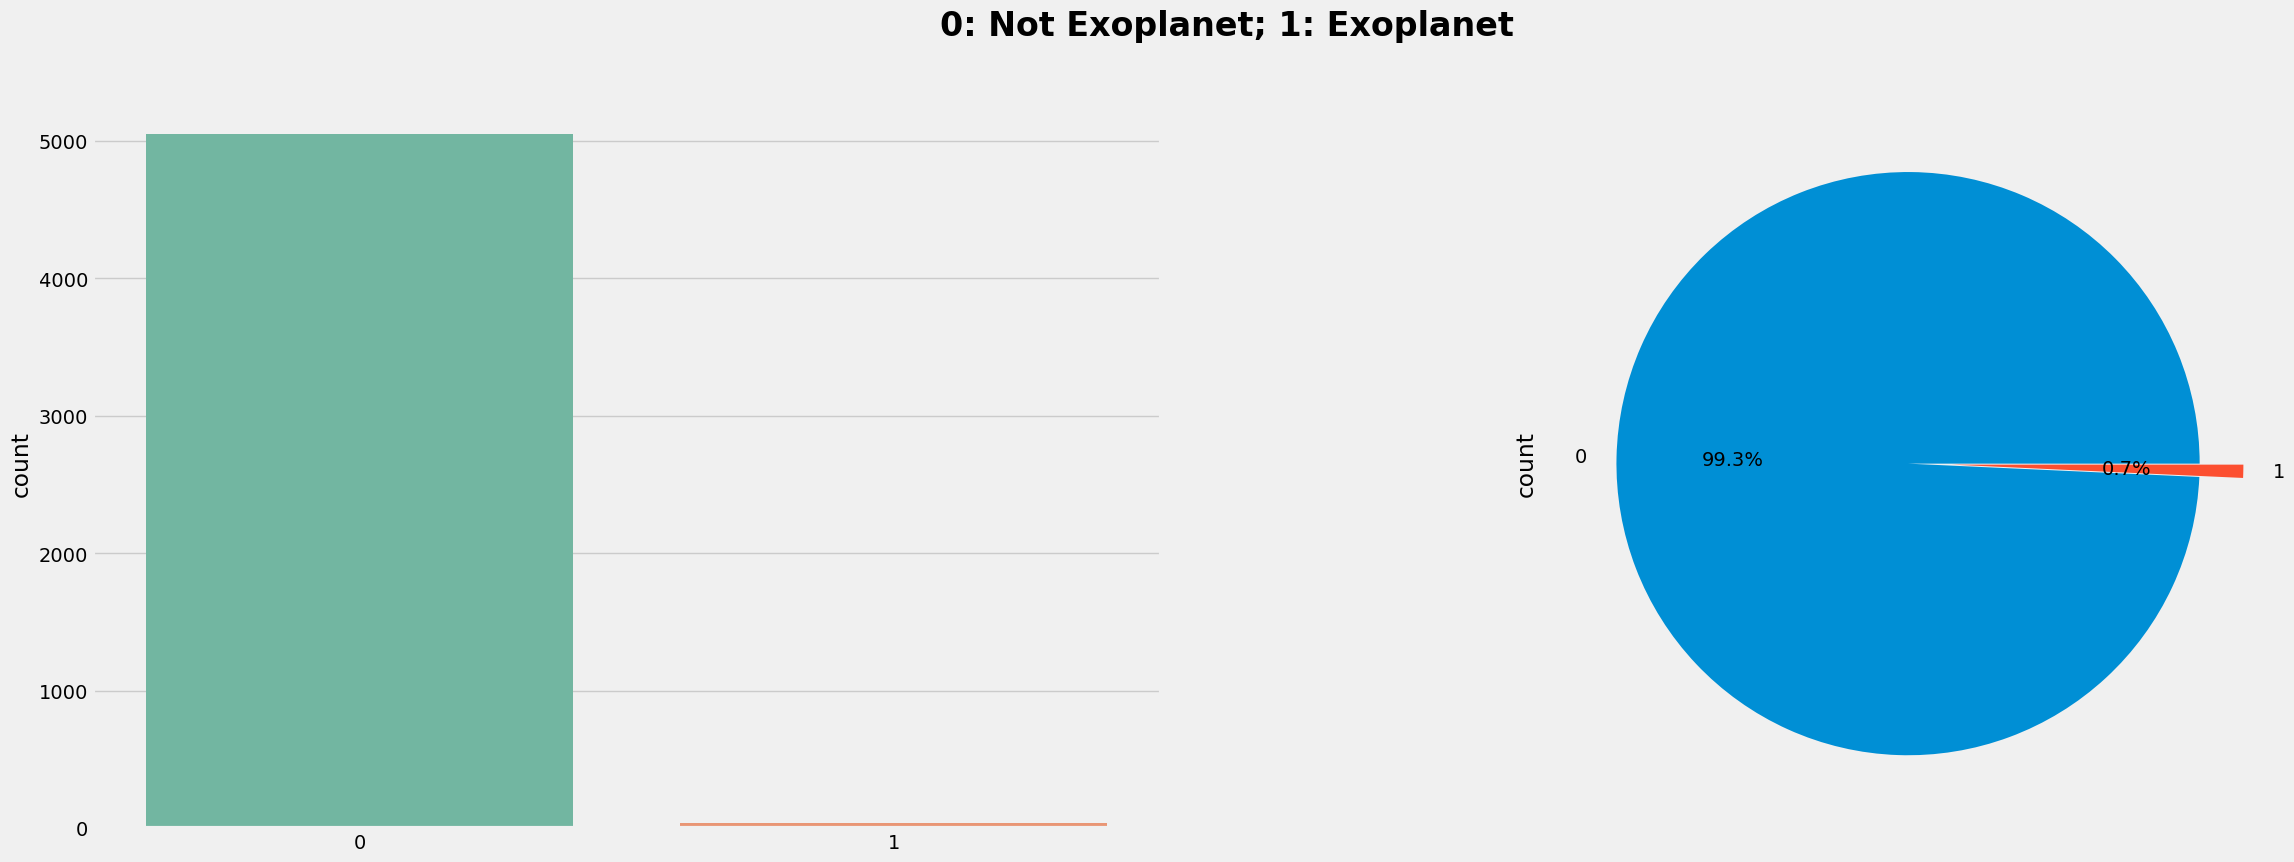

In [8]:
print(exoplanet_data['LABEL'].value_counts())

fig, ax = plt.subplots(1, 2, figsize=(27,9))
sns.countplot(x = 'LABEL', data=exoplanet_data, palette = "Set2", ax = ax[0])
ax[0].set_xlabel('')
exoplanet_data['LABEL'].value_counts().plot.pie(explode = [0,0.15], autopct ='%1.1f%%',ax = ax[1], shadow = False)
fig.suptitle('0: Not Exoplanet; 1: Exoplanet\n', fontsize = 24, fontweight = 'bold')

<div class="alert alert-block alert-danger">Highly disproportionate data: only 0.7% is an exoplanet whereas 99.3% is not exoplanet.</div>

### 2.3 Observing Correlational Patterns

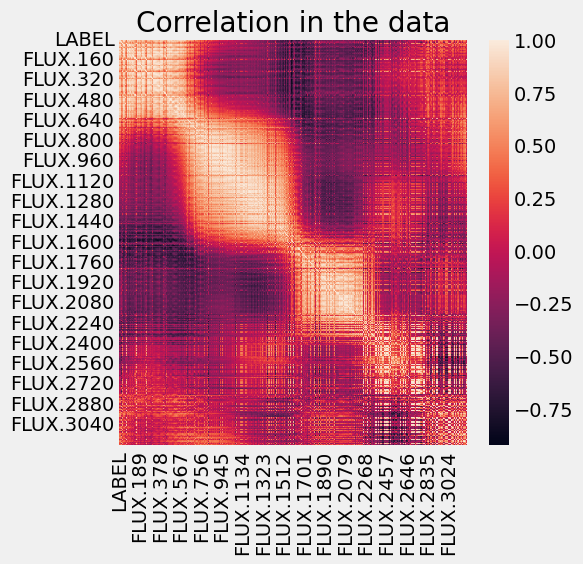

In [9]:
plt.figure(figsize=(5,5))
sns.heatmap(exoplanet_data.corr())
plt.title('Correlation in the data')
plt.show()

<div class="alert alert-warning">Analysis: The correlation matrix does not prove to be insightful. Given that flux readings represent independent observations at different time intervals, the transient nature of astronomical events and the lack of direct influence between consecutive measurements result in a lack of meaningful correlations in the data. </div>

### 2.4 Investigating Flux

In [33]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

train_n=exoplanet_data[exoplanet_data['LABEL'] < 1]
train_e=exoplanet_data[exoplanet_data['LABEL'] == 1]
train_t_n=train_n.iloc[:,1:].T
train_t_e=train_e.iloc[:,1:].T
train_t_e.head(1)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
FLUX.1,93.85,-38.88,532.64,326.52,-1107.21,211.1,9.34,238.77,-103.54,-265.91,...,124.39,-63.5,31.29,-472.5,194.82,26.96,43.07,-248.23,22.82,26.24


In [34]:
# Flux Variations of Non Exoplanets Stars
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 37", "Flux variation of star 5086", 
                                                   "Flux variation of star 3000", "Flux variation of star 3001"))
fig.add_trace(
    go.Scatter(y=train_t_n[37], x=train_t_n.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[5086], x=train_t_n.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_n[3000], x=train_t_n.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_n[3001], x=train_t_n.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Flux Variations of Non Exoplanets Stars",showlegend=False)
fig.show()

In [35]:
# Flux Variations of Exoplanets Stars
fig = make_subplots(rows=2, cols=2,subplot_titles=("Flux variation of star 0", "Flux variation of star 1", 
                                                   "Flux variation of star 35", "Flux variation of star 36"))
fig.add_trace(
    go.Scatter(y=train_t_e[0], x=train_t_e.index),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_e[1], x=train_t_e.index),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(y=train_t_e[35], x=train_t_e.index),
    row=2, col=1
)
fig.add_trace(
    go.Scatter(y=train_t_e[36], x=train_t_e.index),
    row=2, col=2
)
fig.update_layout(height=600, width=800, title_text="Flux Variations of Exoplanets Stars",showlegend=False)

<div class="alert alert-block alert-success">Clear periodic patterns are observed in all the plots, indicating consistent fluctuations in the flux. Even in the case of star 35, there is evident periodic motion, though with a smaller amplitude. These patterns are attributed to the presence of a planet orbiting in front of the respective stars, causing periodic reductions in the received flux. While some anomalies from detection errors are still visible, the overall observation suggests the influence of orbiting planets on the light intensity curves.</div>

## 3. Data Preprocessing

### 3.1 Handling Missing Values

<Axes: >

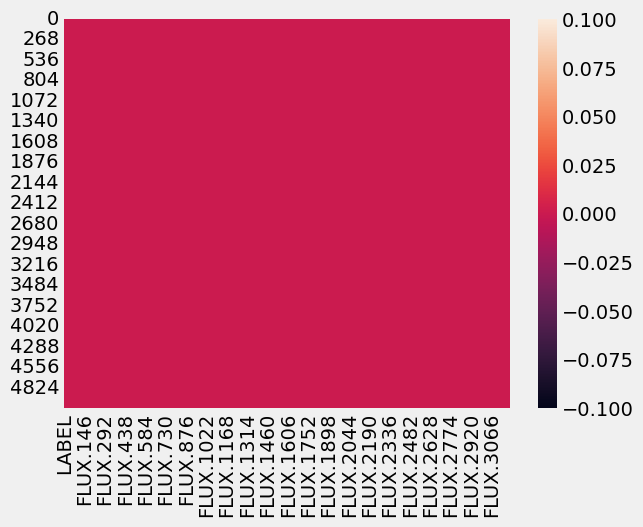

In [13]:
sns.heatmap(exoplanet_data.isnull())

<div class="alert alert-block alert-info">The heatmap representation reveals that there are no missing values present in our dataset.</div>

### 3.2 Outlier Detection and Removal

<Axes: xlabel='LABEL', ylabel='FLUX.5'>

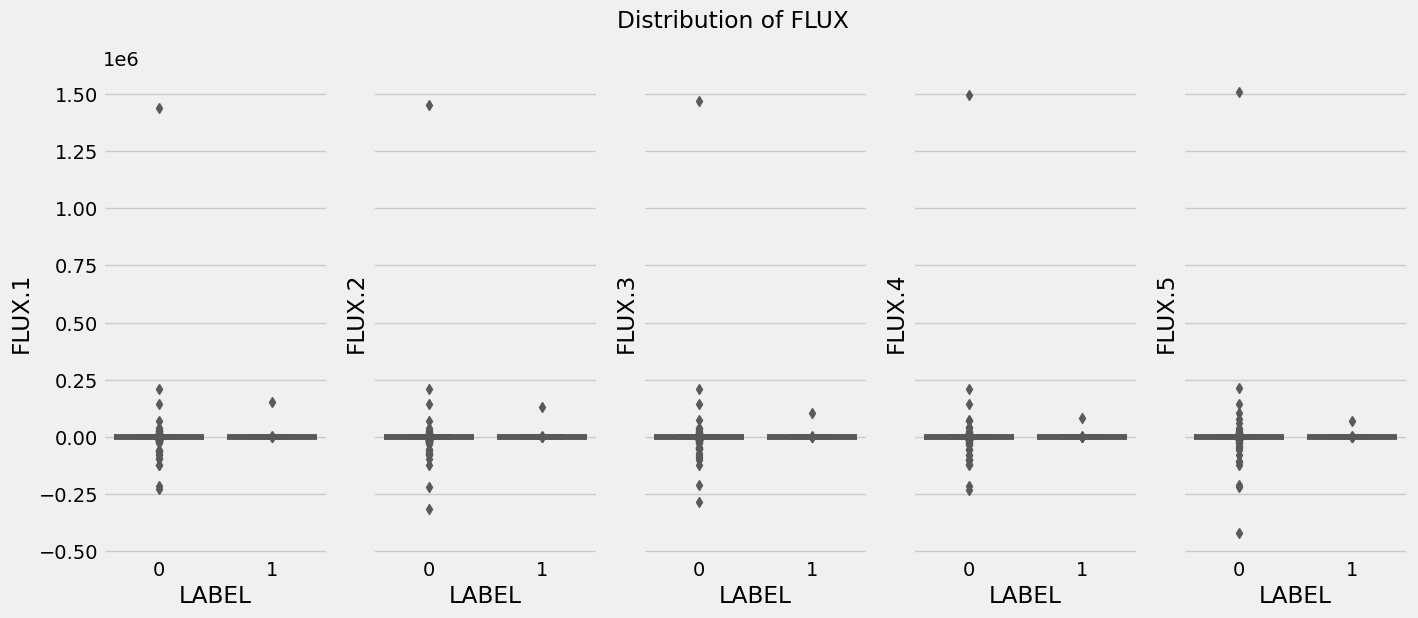

In [14]:
fig, axes = plt.subplots(1, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=exoplanet_data, x='LABEL', y='FLUX.1',palette="Set2")
sns.boxplot(ax=axes[1], data=exoplanet_data, x='LABEL', y='FLUX.2',palette="Set2")
sns.boxplot(ax=axes[2], data=exoplanet_data, x='LABEL', y='FLUX.3',palette="Set2")
sns.boxplot(ax=axes[3], data=exoplanet_data, x='LABEL', y='FLUX.4',palette="Set2")
sns.boxplot(ax=axes[4], data=exoplanet_data, x='LABEL', y='FLUX.5',palette="Set2")

In [15]:
exoplanet_data.drop(exoplanet_data[exoplanet_data['FLUX.1']>250000].index, axis=0, inplace=True)

### 3.3 Handling Imbalance using SMOTE (Synthetic Minority Oversampling Technique)

**SMOTE (Synthetic Minority Over-sampling Technique)** is a technique used to address class imbalance in a dataset, particularly in binary classification problems where one class is significantly underrepresented compared to the other. The goal of SMOTE is to balance the class distribution by generating synthetic examples of the minority class.

In [16]:
from imblearn.over_sampling import SMOTE
model = SMOTE()
input_features, output_feature = model.fit_resample(exoplanet_data.drop('LABEL',axis=1), exoplanet_data['LABEL'])
output_feature = output_feature.astype('int')

In [17]:
output_feature.value_counts()

LABEL
1    5049
0    5049
Name: count, dtype: int64

### 3.4 Data Normalization

**Data Normalization** is a preprocessing technique used in machine learning to scale numerical features within a consistent range. The goal is to ensure that all features contribute equally to the model training process, especially when the features have different scales.

In [18]:
input_features = normalized = normalize(input_features)

### 3.5 Apply Gaussian Filters

In probability theory, the normal distribution, often referred to as the Gaussian distribution, is a continuous probability distribution. It is characterized by its bell-shaped curve and is crucial in statistics for modeling real-valued random variables whose distributions are not explicitly known

**Gaussian filters**, in the context of image processing and data analysis, are filters based on the principles of the Gaussian distribution. They are used to smooth or blur signals, images, or datasets, effectively reducing noise and emphasizing underlying patterns.

In the context of this project, where the dataset contains flux readings, applying a Gaussian filter can help **smooth out fluctuations and emphasize underlying patterns** in the light intensity curves. This is especially beneficial for identifying periodic patterns associated with exoplanet transits.

In [19]:
input_features = filtered = ndimage.filters.gaussian_filter(input_features, sigma=10)

### 3.6 Feature Scaling

Feature scaling through **Standardization**, ensures that all features have a consistent scale, preventing certain features from dominating others in machine learning models.

In [20]:
std_scaler = StandardScaler()
input_features = scaled = std_scaler.fit_transform(input_features)

### 3.7 Dimensionality Reduction using PCA (Principal Component Analysis)

**Principal Component Analysis (PCA)** is a dimensionality reduction technique commonly used in machine learning and statistics. Its goal is to transform the original features into a new set of uncorrelated variables, known as principal components, which capture the maximum variance in the data. This reduction in dimensionality can help retain the most important information while discarding less significant details.

In [21]:
# Determining the number of Principal Components (k)
from sklearn.decomposition import PCA
pca = PCA() 
input_features = pca.fit_transform(input_features)
input_features = pca.transform(input_features)
total=sum(pca.explained_variance_)
k=0
current_variance=0
while current_variance/total < 0.90:
    current_variance += pca.explained_variance_[k]
    k=k+1
print(k)

23


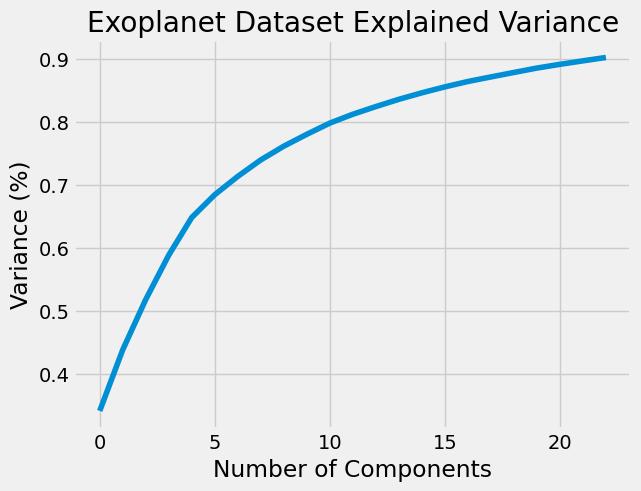

In [22]:
pca = PCA(n_components=23)
input_features = pca.fit_transform(input_features)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Exoplanet Dataset Explained Variance')
plt.show()

In [23]:
input_features.shape

(10098, 23)

### 3.8 Splitting into Testing Data and Training Data

In [24]:
train_X, test_X, train_y, test_y = train_test_split(input_features, output_feature, test_size=0.33, random_state=42)

## 4. Model Building and Evaluation

In this section, we will build and evaluate several machine learning models. We will start with traditional models and proceed to more advanced models. The performance of these models will be assessed based on their accuracy, precision, recall, and F1-score.

### Model Building

In [25]:
def model(classifier,dtrain_x,dtrain_y,dtest_x,dtest_y):
    classifier.fit(dtrain_x,dtrain_y)

    prediction=classifier.predict(dtest_x)

    print('Validation accuracy of model is', accuracy_score(prediction,dtest_y))
    print ("\nClassification report :\n",(classification_report(dtest_y,prediction)))

    #Confusion matrix
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(dtest_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
    plt.title("CONFUSION MATRIX",fontsize=20)

    #ROC curve and Area under the curve plotting
    predicting_probabilites = classifier.predict_proba(dtest_x)[:,1]
    fpr,tpr,thresholds = roc_curve(dtest_y,predicting_probabilites)
    plt.subplot(222)
    plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
    plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
    plt.legend(loc = "best")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

### 4.1 K Nearest Neighbors

Validation accuracy of model is 0.9993999399939995

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1709
           1       1.00      1.00      1.00      1624

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



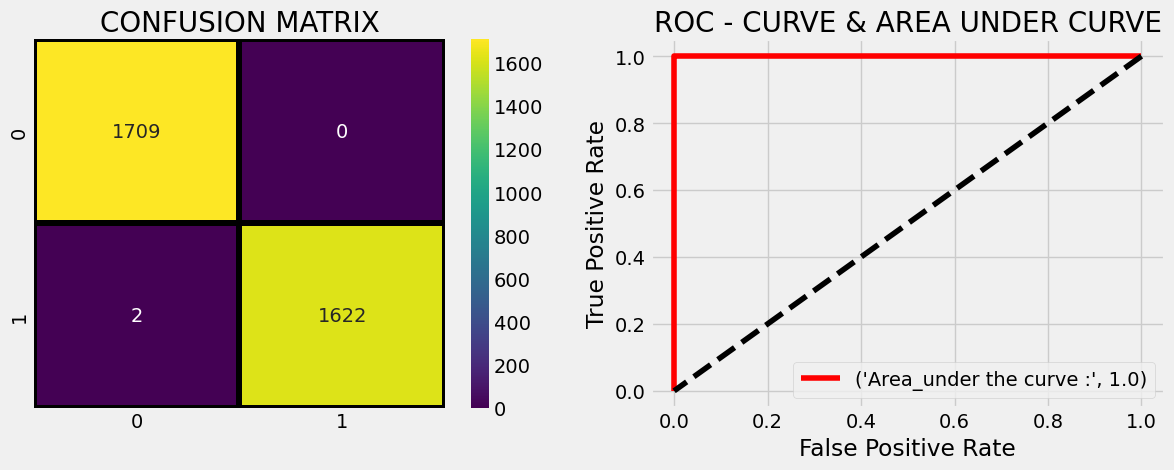

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
model(knn_model,train_X,train_y,test_X,test_y)

### 4.2 Logistic Regression

Validation accuracy of model is 0.9996999699969997

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1709
           1       1.00      1.00      1.00      1624

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



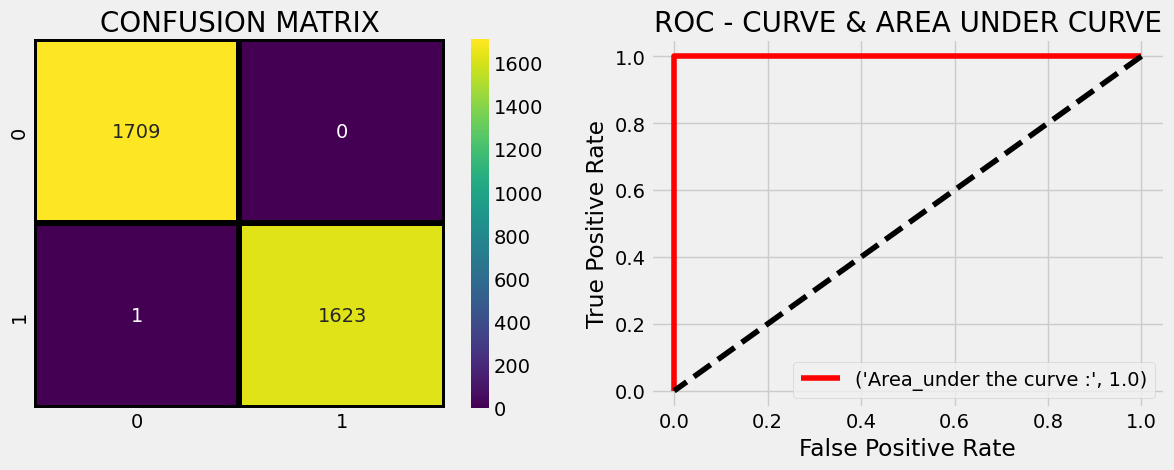

In [27]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs', max_iter=1000)
model(lr_model,train_X,train_y,test_X,test_y)

### 4.3 Bernoulli Naive Bayes

Validation accuracy of model is 0.9951995199519952

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1709
           1       1.00      0.99      1.00      1624

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



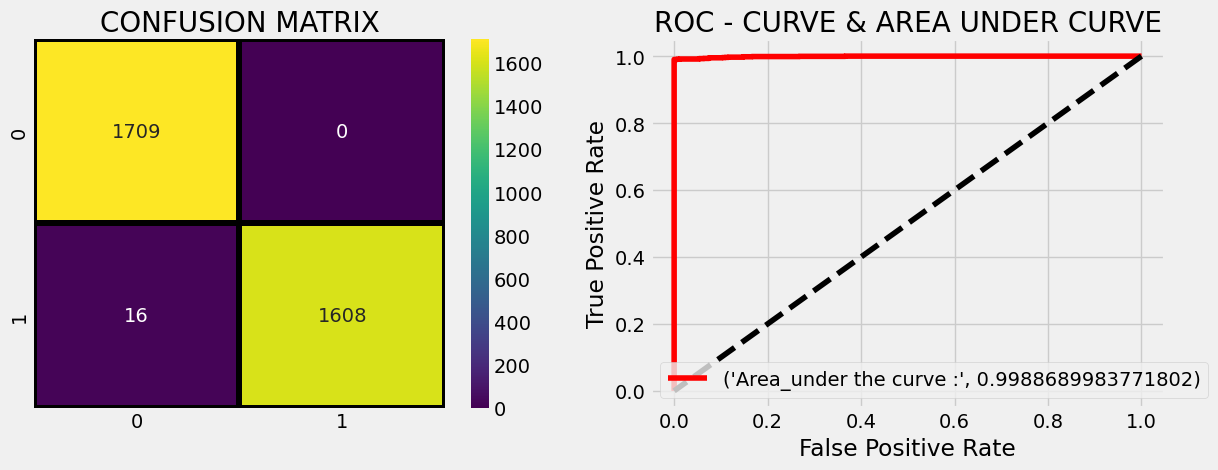

In [28]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
model(bnb,train_X,train_y,test_X,test_y)

### 4.4 Decision Tree Algorithm

Validation accuracy of model is 0.9996999699969997

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1709
           1       1.00      1.00      1.00      1624

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



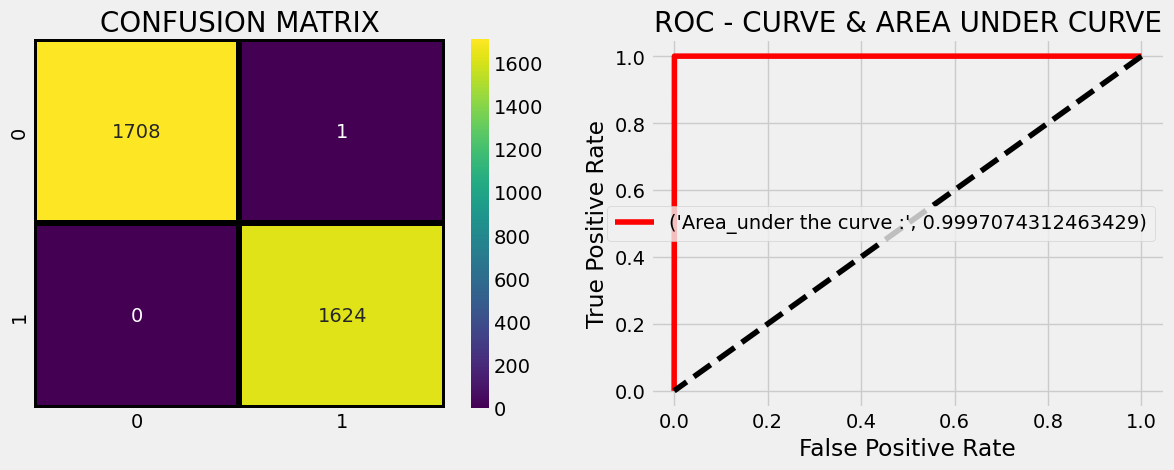

In [29]:
from sklearn.tree import DecisionTreeClassifier
ds_model = DecisionTreeClassifier(max_depth=5, random_state=13)
model(ds_model,train_X,train_y,test_X,test_y)

### 4.5 Random Forest Algorithm

Validation accuracy of model is 0.9996999699969997

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1709
           1       1.00      1.00      1.00      1624

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



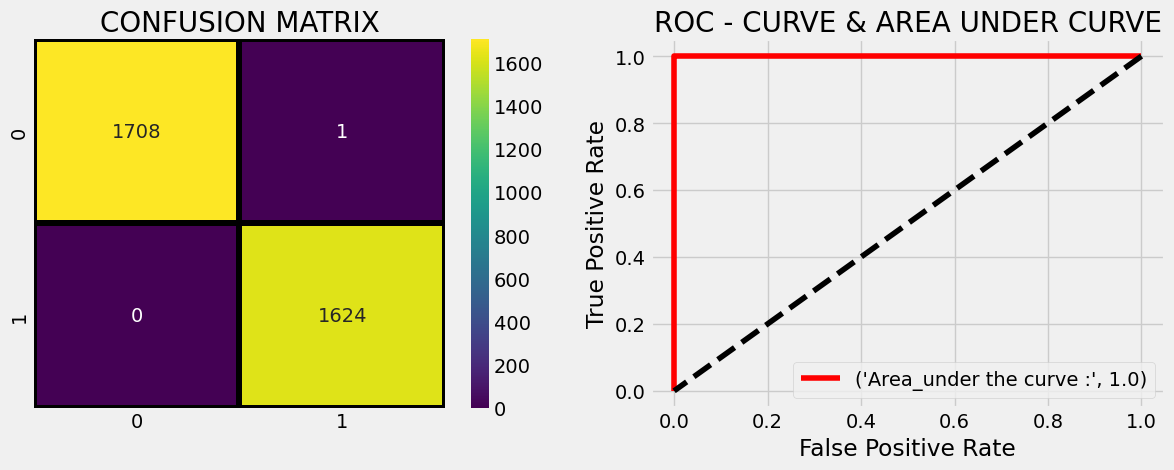

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
model(rf_classifier,train_X,train_y,test_X,test_y)

### 4.6 XGBoost Classifier

Validation accuracy of model is 0.9996999699969997

Classification report :
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1709
           1       1.00      1.00      1.00      1624

    accuracy                           1.00      3333
   macro avg       1.00      1.00      1.00      3333
weighted avg       1.00      1.00      1.00      3333



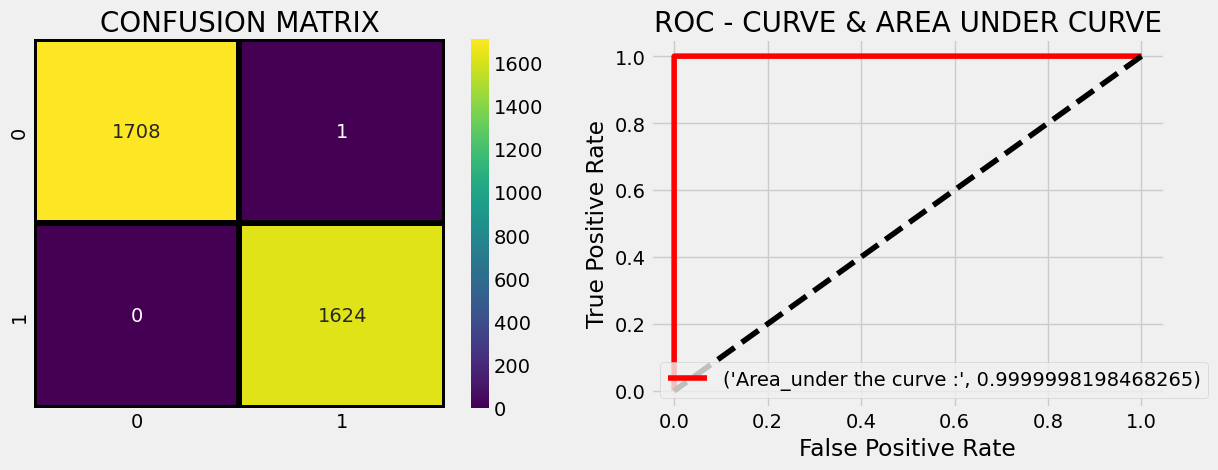

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
model(xgb,train_X,train_y,test_X,test_y)